In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [5]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn Info:")
print(df.info())

Shape of dataset: (9712, 8)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
None


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [8]:
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Avg_Daily_Screen_Time_hr' in df.columns:
    df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].fillna(df['Avg_Daily_Screen_Time_hr'].median())

In [9]:
for col in ['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [10]:
df = df.drop_duplicates()

In [11]:
for col in ['Gender', 'Primary_Device', 'Urban_or_Rural']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [12]:
if 'Avg_Daily_Screen_Time_hr' in df.columns:
    df = df[df['Avg_Daily_Screen_Time_hr'] <= 15]

print("Data cleaning complete (no warnings expected)")
df.info()

Data cleaning complete (no warnings expected)
<class 'pandas.core.frame.DataFrame'>
Index: 9665 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9665 non-null   int64  
 1   Gender                             9665 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9665 non-null   float64
 3   Primary_Device                     9665 non-null   object 
 4   Exceeded_Recommended_Limit         9665 non-null   bool   
 5   Educational_to_Recreational_Ratio  9665 non-null   float64
 6   Health_Impacts                     9665 non-null   object 
 7   Urban_or_Rural                     9665 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.5+ KB


In [13]:
print("Remaining Missing Values:")
print(df.isnull().sum())

Remaining Missing Values:
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [14]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
Age: 11
Gender: 2
Avg_Daily_Screen_Time_hr: 899
Primary_Device: 4
Exceeded_Recommended_Limit: 2
Educational_to_Recreational_Ratio: 31
Health_Impacts: 15
Urban_or_Rural: 2


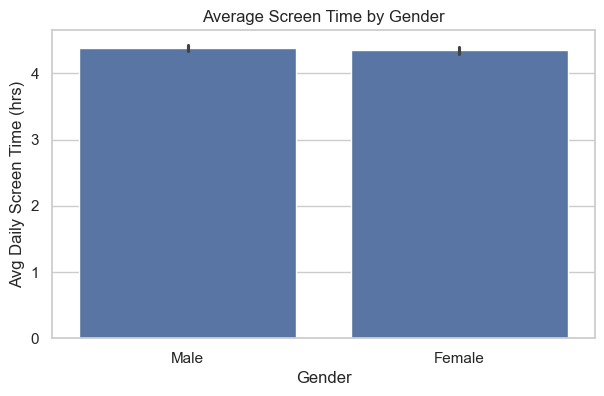

In [15]:
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, estimator=np.mean)
plt.title("Average Screen Time by Gender")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_37972\961985998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Primary_Device', data=df, palette='viridis')


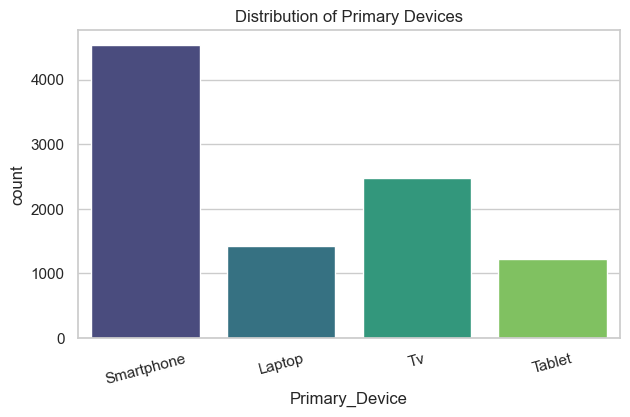

In [16]:
sns.countplot(x='Primary_Device', data=df, palette='viridis')
plt.title("Distribution of Primary Devices")
plt.xticks(rotation=15)
plt.show()


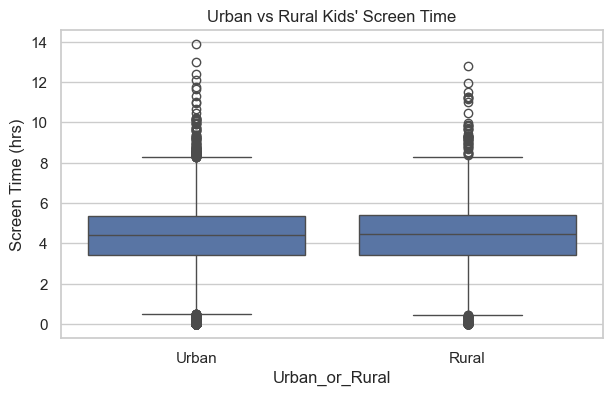

In [17]:
sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Urban vs Rural Kids' Screen Time")
plt.ylabel("Screen Time (hrs)")
plt.show()


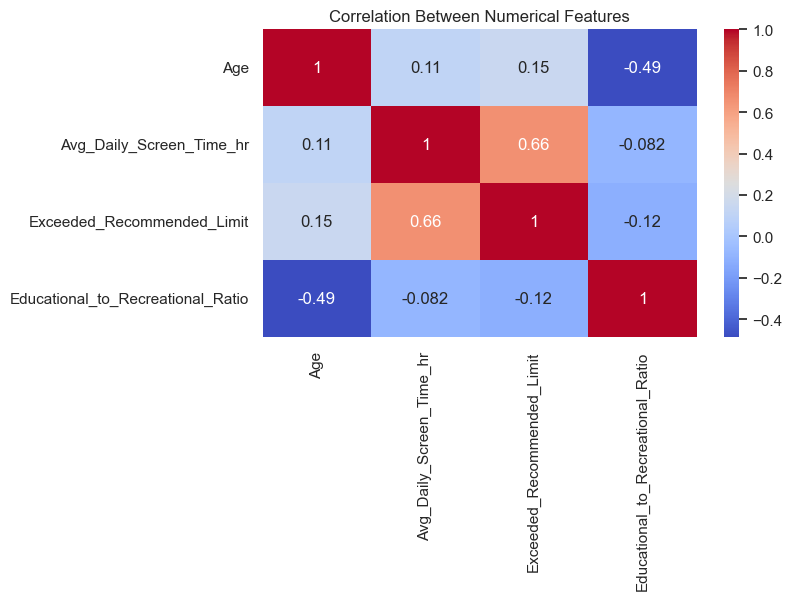

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()
